GOLD PRICE PREDICTION :

FLOW OF OUR PROJECT :    

GOLD PRICE DATA ---> DATA PREPROCESSING ---> DATA ANALYSIS ---> TRAIN TEST SPLIT --- > RANDOM FOREST REGRESSOR ---> EVALUATE MODEL BASED ON TEST DATA

IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA COLLECTION AND PROCESSING

In [2]:
# loading the csv data to pandas DataFrame
gold_data = pd.read_csv("/content/gld_price_data.csv")

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows from dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some information about the data
gold_data.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
# checking number of missing values
gold_data.isnull().sum()
# no missing valuation in this dataset

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

CORRELATION :

1. POSITIVE CORRELATION

2. NEGATIVE CORRELATION

In [9]:
# converting date to datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
correlation = gold_data.corr()

<Axes: >

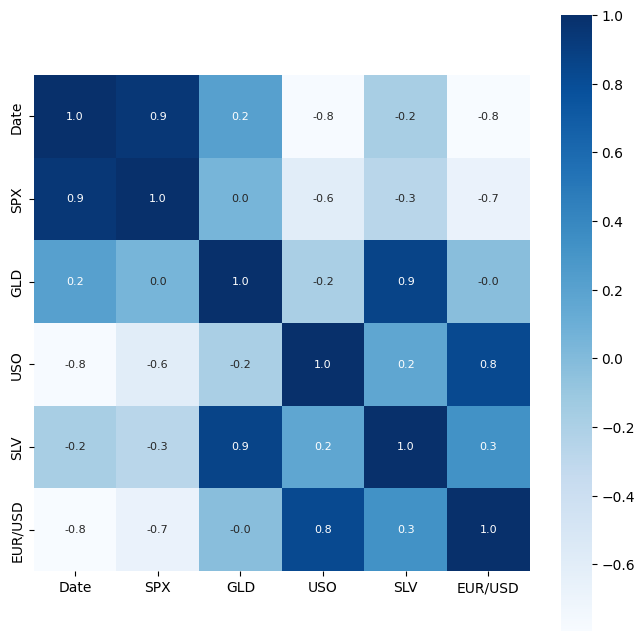

In [10]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


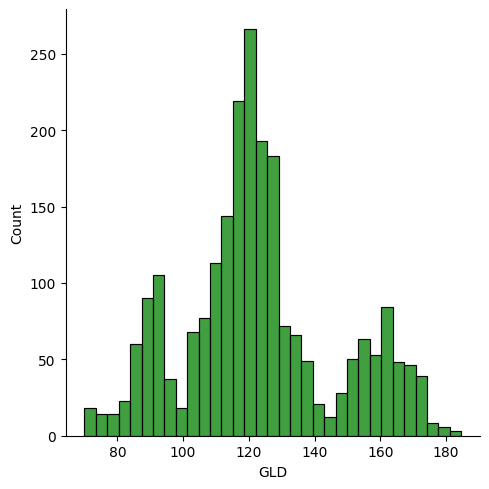

In [12]:
# checking the distribution of the GLD Price
sns.displot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [13]:
X= gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and testing data

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

MODEL TRAINING : RANDOM FOREST

 IT IS AN ENSEBMLE MODEL OF DECISION TREES

In [17]:
# loading RandomForestRegressor into Regressor variable
regressor = RandomForestRegressor()
# training the model using fit function
regressor.fit(X_train,Y_train)

RandomForestRegressor()

MODEL EVALUATION

In [18]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [19]:
print(test_data_prediction)

[168.36699968  81.81080003 115.97099963 127.78990084 120.83100088
 154.76769789 150.27769923 126.22420034 117.42569896 125.8213009
 116.42280124 172.33810105 141.15599856 168.09559887 115.07200031
 117.7775008  137.06140382 170.09270116 159.10860267 158.13599904
 155.11879982 125.62130038 175.77709937 156.76970416 125.21870041
  93.76159978  77.15250007 120.52600028 119.17019998 167.50599916
  88.29819992 125.35449993  91.1548011  117.62440023 121.12929902
 136.32780097 115.70110104 114.99190089 148.59109923 107.19930116
 104.61120263  87.21569789 126.5948008  117.84530022 153.07619918
 119.63359994 108.36599982 107.98159864  93.24150051 127.15479769
  74.96050049 113.61779921 121.47600008 111.13359889 118.93459912
 121.093699   158.9172004  168.27800096 147.05099685  85.65629822
  94.37720033  86.81999893  90.52720025 118.88570086 126.43450044
 127.46700001 169.14359976 122.26709955 117.32429929  98.79990012
 168.38590124 143.00429818 131.78610214 121.17610214 121.32869964
 119.970600

In [20]:
# we need to compare actual and predicted values
# R squared error
error_score= metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ", error_score)


R squared error :  0.988637744876463


Compare the Actual values and Predicted values in a plot

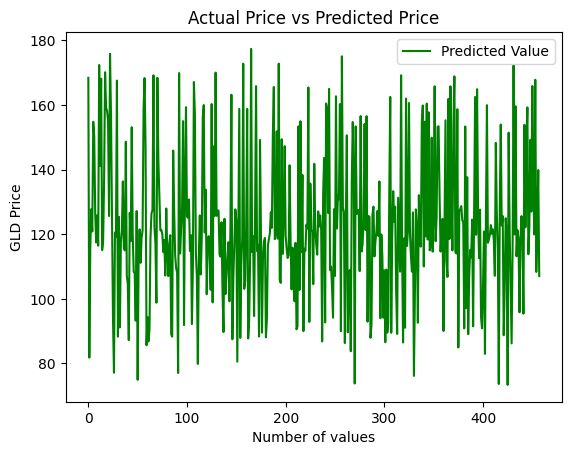

In [22]:
#plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction, color='green', label = "Predicted Value")
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()